<a href="https://colab.research.google.com/github/Leonardorochagit/Geracao_Energia/blob/main/Previsao_GeracaoEnergia_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Universidade do Estado do Amazonas</center>
###  <center>Escola Superior de Tecnologia</center>
#####  <center>Pós-graduação Lato Sensu em Ciência de Dados</center>
#####  <center>Programação para Ciência de Dados (Turma 02)</center>
---
## <center>TCC de Conclusão de Curso </center>
## <center> Previsão de Geração de Energia: Amazonas </center>


## **1. Importação das Bibliotecas e Configurações Ambiente**



In [90]:
# !pip install sweetviz -q
# !pip install -U pandas-profiling
# !pip install --user -q datascience

In [91]:
!pip install --user -q pandas -plotting


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -p


In [92]:
! git clone https://github.com/Leonardorochagit/Geracao_Energia
#! git clone https://github.com/paulordie/sentimental_ds
%cd Geracao_Energia/Base_ONS/

Cloning into 'Geracao_Energia'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 84 (delta 37), reused 35 (delta 13), pack-reused 0
Unpacking objects: 100% (84/84), done.
Checking out files: 100% (41/41), done.
/content/Geracao_Energia/Base_ONS/Geracao_Energia/Base_ONS


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import pyplot
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [94]:
import numpy as np
import pandas as pd
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from datetime import datetime
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,15)
import seaborn as sns

In [95]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Blues_r")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

In [96]:
pd.options.display.max_columns = None

## **2. Abrindo a Base de Dados** 

In [111]:
# Convertendo o dataset em um dataframe com Pandas
df = pd.read_csv('/content/Geracao_Energia/Base_ONS/4. Simples_Geração_de_Energia_Dia_data AMAZONAS.csv', sep = ';', 
                 index_col=0, header=0, parse_dates=True, squeeze=True) # header=0, index_col=0, parse_dates=True, squeeze=True
df.head()    

,cod_aneel (tb_referenciacegusina (Usina)),cod_nucleoaneel (tb_referenciacegusina (Usina)),Data Dica,dsc_estado,id_subsistema,nom_tipousinasite,nom_usina2,Período Exibido GE,Selecione Tipo de GE Simp 4
Data Escala de Tempo 1 GE Simp 4,,,,,,,,,
2013-09-07 00:00:00,*,*,9/7/2013 0:00,AMAZONAS,Norte,*,*,5,"0,56682"
2013-09-07 01:00:00,*,*,9/7/2013 1:00,AMAZONAS,Norte,*,*,5,"0,73739"
2013-09-07 02:00:00,*,*,9/7/2013 2:00,AMAZONAS,Norte,*,*,5,"0,74197"
2013-09-07 03:00:00,*,*,9/7/2013 3:00,AMAZONAS,Norte,*,*,5,"0,73323"
2013-09-07 04:00:00,*,*,9/7/2013 4:00,AMAZONAS,Norte,*,*,5,"0,79895"


In [112]:
df.columns


Index(['cod_aneel (tb_referenciacegusina (Usina))',
       'cod_nucleoaneel (tb_referenciacegusina (Usina))', 'Data Dica',
       'dsc_estado', 'id_subsistema', 'nom_tipousinasite', 'nom_usina2',
       'Período Exibido GE', 'Selecione Tipo de GE Simp 4'],
      dtype='object')

In [113]:
lista_colunas_drop = ['cod_aneel (tb_referenciacegusina (Usina))', 'cod_nucleoaneel (tb_referenciacegusina (Usina))', 
                      'Data Dica','dsc_estado', 'id_subsistema', 'nom_tipousinasite', 'nom_usina2', 
                      'Período Exibido GE']
df=df.drop(columns=lista_colunas_drop)
df

,Selecione Tipo de GE Simp 4
Data Escala de Tempo 1 GE Simp 4,
2013-09-07 00:00:00,"0,56682"
2013-09-07 01:00:00,"0,73739"
2013-09-07 02:00:00,"0,74197"
2013-09-07 03:00:00,"0,73323"
2013-09-07 04:00:00,"0,79895"
...,...
2022-01-17 19:00:00,"0,741464"
2022-01-17 20:00:00,"0,740971"
2022-01-17 21:00:00,"0,74189"


In [114]:
df = df.rename(columns={'Data Escala de Tempo 1 GE Simp 4':'Data/Hora','Selecione Tipo de GE Simp 4':'Geracao_(GWh)'})
#df = df.reset_index(drop=True)
df.head(10)

,Geracao_(GWh)
Data Escala de Tempo 1 GE Simp 4,
2013-09-07 00:00:00,"0,56682"
2013-09-07 01:00:00,"0,73739"
2013-09-07 02:00:00,"0,74197"
2013-09-07 03:00:00,"0,73323"
2013-09-07 04:00:00,"0,79895"
2013-09-07 05:00:00,"0,79833"
2013-09-07 06:00:00,"0,80018"
2013-09-07 07:00:00,"0,79931"
2013-09-07 08:00:00,"0,79672"


In [115]:
df.index.names = ['Data/Hora']
df

,Geracao_(GWh)
Data/Hora,
2013-09-07 00:00:00,"0,56682"
2013-09-07 01:00:00,"0,73739"
2013-09-07 02:00:00,"0,74197"
2013-09-07 03:00:00,"0,73323"
2013-09-07 04:00:00,"0,79895"
...,...
2022-01-17 19:00:00,"0,741464"
2022-01-17 20:00:00,"0,740971"
2022-01-17 21:00:00,"0,74189"


In [116]:
df['Geracao_(GWh)']=df['Geracao_(GWh)'].apply(lambda x: str(x).replace(',','.'))
df

,Geracao_(GWh)
Data/Hora,
2013-09-07 00:00:00,0.56682
2013-09-07 01:00:00,0.73739
2013-09-07 02:00:00,0.74197
2013-09-07 03:00:00,0.73323
2013-09-07 04:00:00,0.79895
...,...
2022-01-17 19:00:00,0.741464
2022-01-17 20:00:00,0.740971
2022-01-17 21:00:00,0.74189


In [117]:
df['Geracao_(GWh)']=df['Geracao_(GWh)'].astype('float64')

In [118]:
df.describe()

,Geracao_(GWh)
count,74514.000000
mean,0.858840
std,0.217121
min,0.023331
25%,0.695722
50%,0.859378
75%,1.027196
max,1.296660


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74514 entries, 2013-09-07 00:00:00 to 2022-01-17 23:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geracao_(GWh)  74514 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [120]:
df.index

DatetimeIndex(['2013-09-07 00:00:00', '2013-09-07 01:00:00',
               '2013-09-07 02:00:00', '2013-09-07 03:00:00',
               '2013-09-07 04:00:00', '2013-09-07 05:00:00',
               '2013-09-07 06:00:00', '2013-09-07 07:00:00',
               '2013-09-07 08:00:00', '2013-09-07 09:00:00',
               ...
               '2022-01-17 14:00:00', '2022-01-17 15:00:00',
               '2022-01-17 16:00:00', '2022-01-17 17:00:00',
               '2022-01-17 18:00:00', '2022-01-17 19:00:00',
               '2022-01-17 20:00:00', '2022-01-17 21:00:00',
               '2022-01-17 22:00:00', '2022-01-17 23:00:00'],
              dtype='datetime64[ns]', name='Data/Hora', length=74514, freq=None)

In [121]:
df['year'] = df.index.year
df['month']  = df.index.month
df['weekday'] = df.index.weekday
df['weekofyear'] = df.index.weekofyear
df['quarter'] = df.index.quarter
df.tail(3)

,Geracao_(GWh),year,month,weekday,weekofyear,quarter
Data/Hora,,,,,,
2022-01-17 21:00:00,0.741890,2022,1,0,3,1
2022-01-17 22:00:00,0.739852,2022,1,0,3,1
2022-01-17 23:00:00,0.740491,2022,1,0,3,1


## **3. Manipulando a Base de Dados** 

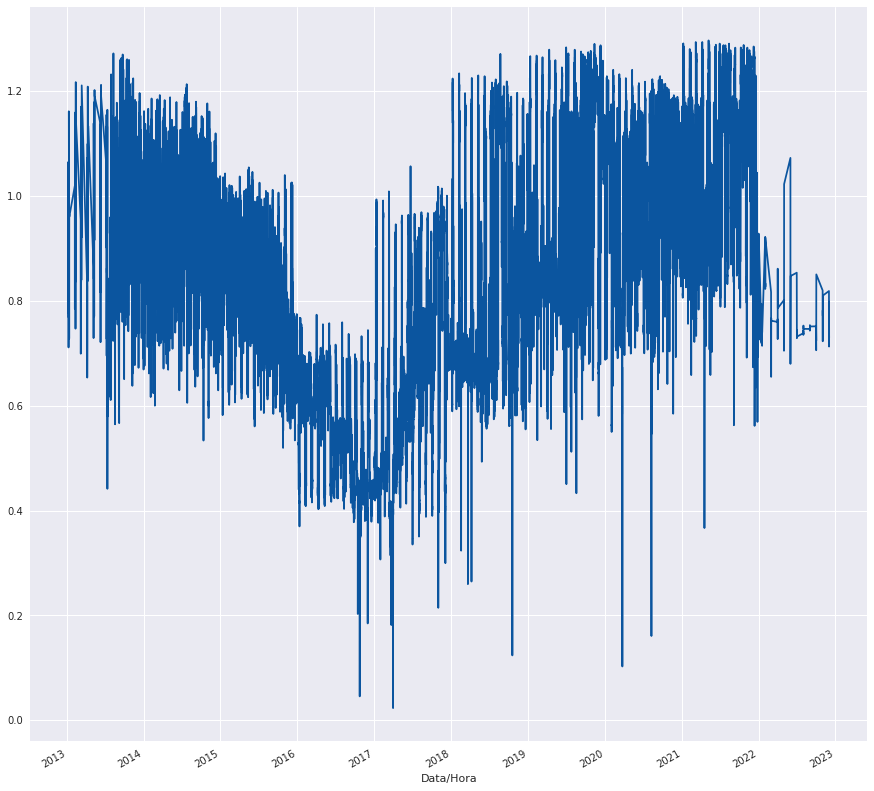

In [122]:
df['Geracao_(GWh)'].plot()

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74514 entries, 2013-09-07 00:00:00 to 2022-01-17 23:00:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geracao_(GWh)  74514 non-null  float64
 1   year           74514 non-null  int64  
 2   month          74514 non-null  int64  
 3   weekday        74514 non-null  int64  
 4   weekofyear     74514 non-null  int64  
 5   quarter        74514 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 4.0 MB


In [124]:
df1 = df.iloc[:,0:1]

In [125]:
df1

,Geracao_(GWh)
Data/Hora,
2013-09-07 00:00:00,0.566820
2013-09-07 01:00:00,0.737390
2013-09-07 02:00:00,0.741970
2013-09-07 03:00:00,0.733230
2013-09-07 04:00:00,0.798950
...,...
2022-01-17 19:00:00,0.741464
2022-01-17 20:00:00,0.740971
2022-01-17 21:00:00,0.741890


In [126]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74514 entries, 2013-09-07 00:00:00 to 2022-01-17 23:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geracao_(GWh)  74514 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [127]:
# Grouping data based on month and store type
dfbox= df1.groupby([pd.Grouper(freq='A'), 'Geracao_(GWh)']).sum().head(15)

In [128]:
dfbox.head(30)

Empty DataFrame
Columns: []
Index: [(2013-12-31 00:00:00, 0.44152), (2013-12-31 00:00:00, 0.46556), (2013-12-31 00:00:00, 0.56452), (2013-12-31 00:00:00, 0.56682), (2013-12-31 00:00:00, 0.57087), (2013-12-31 00:00:00, 0.57735), (2013-12-31 00:00:00, 0.57956), (2013-12-31 00:00:00, 0.57972), (2013-12-31 00:00:00, 0.58011), (2013-12-31 00:00:00, 0.58094), (2013-12-31 00:00:00, 0.58116), (2013-12-31 00:00:00, 0.58165), (2013-12-31 00:00:00, 0.58298), (2013-12-31 00:00:00, 0.58309), (2013-12-31 00:00:00, 0.5835)]

In [152]:
df_ano.T

Data/Hora,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
Geracao_(GWh),4028.558318,8193.022369,7204.733258,4756.022458,5719.720343,7160.904127,8558.997862,8789.920832,9270.359634,313.338639


In [154]:
import seaborn as sns

In [156]:
#for i in df_ano:
    sns.boxplot(x = df_ano['Geracao_(GWh)'], data = df_ano,color = 'yellowgreen')   #Sepalwidthcm has outliers
    plt.xlabel(i)
    plt.show()

IndentationError: ignored

In [129]:
# from pandas import DataFrame
# years=DataFrame()
# for name, group in df1: 
#    years[name.year]=group.values
# years.boxplot
# pyplot.show()

In [130]:
pd.date_range('2008-01-01', '2022-01-10', freq='M')

DatetimeIndex(['2008-01-31', '2008-02-29', '2008-03-31', '2008-04-30',
               '2008-05-31', '2008-06-30', '2008-07-31', '2008-08-31',
               '2008-09-30', '2008-10-31',
               ...
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', length=168, freq='M')

In [131]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Geracao_(GWh)']
# Resample to weekly frequency, aggregating with mean
df_ano = df1[data_columns].resample('Y').sum()
df_ano.head(15)

,Geracao_(GWh)
Data/Hora,
2013-12-31,4028.558318
2014-12-31,8193.022369
2015-12-31,7204.733258
2016-12-31,4756.022458
2017-12-31,5719.720343
2018-12-31,7160.904127
2019-12-31,8558.997862
2020-12-31,8789.920832
2021-12-31,9270.359634


In [132]:
# years = DataFrame()
# for name, group in groups:
# 	years[name.year] = group.values
# years.boxplot()
# pyplot.show()

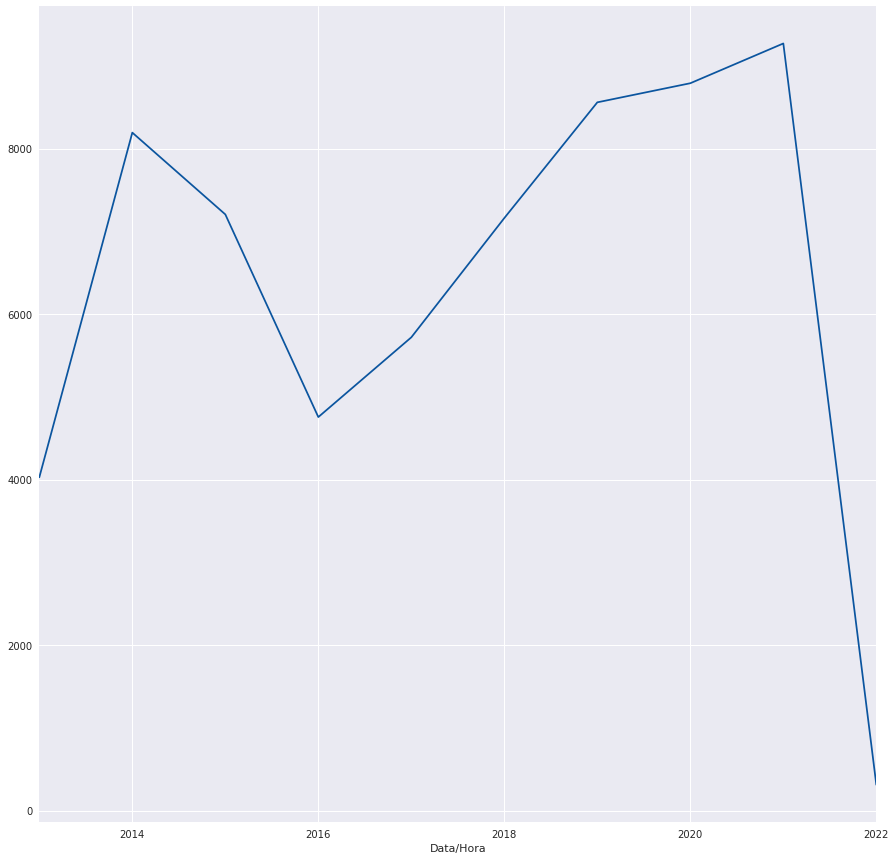

In [133]:
df_ano['Geracao_(GWh)'].plot()

In [134]:
df_ano

,Geracao_(GWh)
Data/Hora,
2013-12-31,4028.558318
2014-12-31,8193.022369
2015-12-31,7204.733258
2016-12-31,4756.022458
2017-12-31,5719.720343
2018-12-31,7160.904127
2019-12-31,8558.997862
2020-12-31,8789.920832
2021-12-31,9270.359634


In [135]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

In [ ]:
groups = df1.groupby(Grouper(freq='A'))
groups.head(10)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


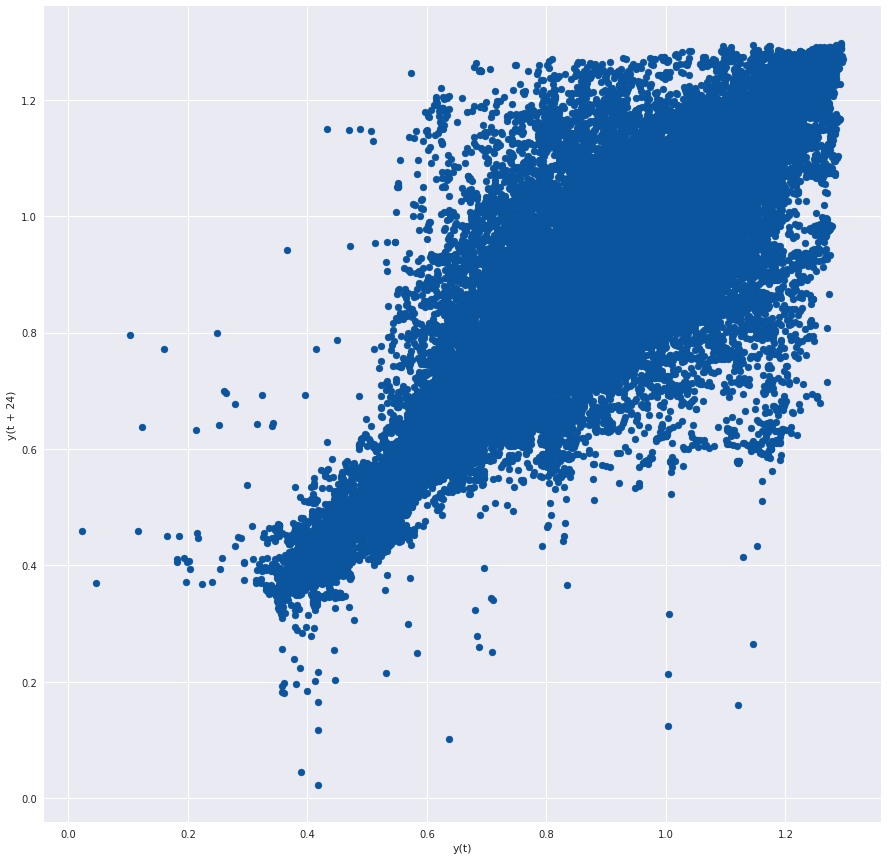

In [137]:
#Try lag 1 day
pd.plotting.lag_plot(df['Geracao_(GWh)'], lag =24 )

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


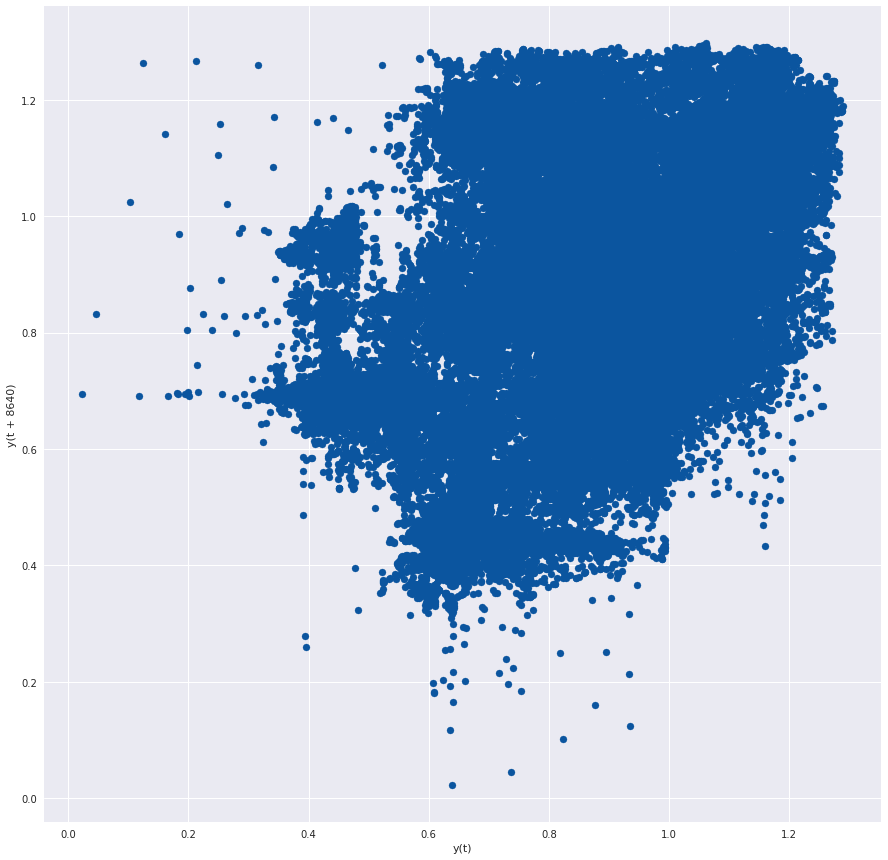

In [138]:
#Try lag 365 day
pd.plotting.lag_plot(df['Geracao_(GWh)'], lag = 8640)

Auto-correlation Plots

In [139]:
from pandas.plotting import autocorrelation_plot

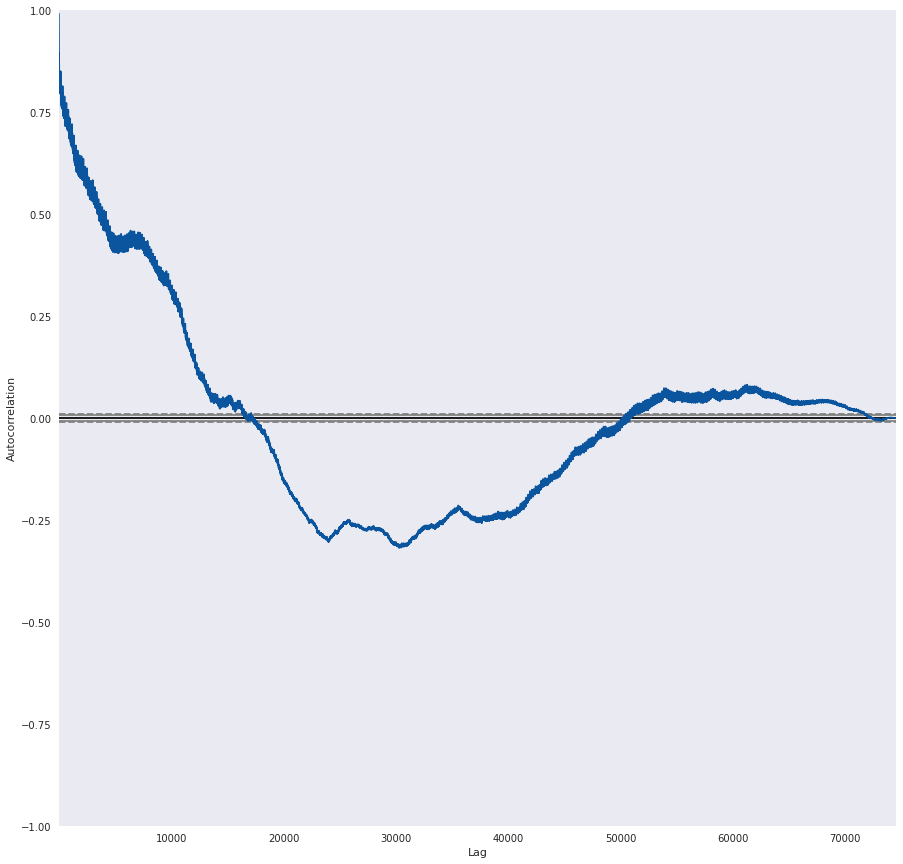

In [140]:
autocorrelation_plot(df1)
pyplot.show()

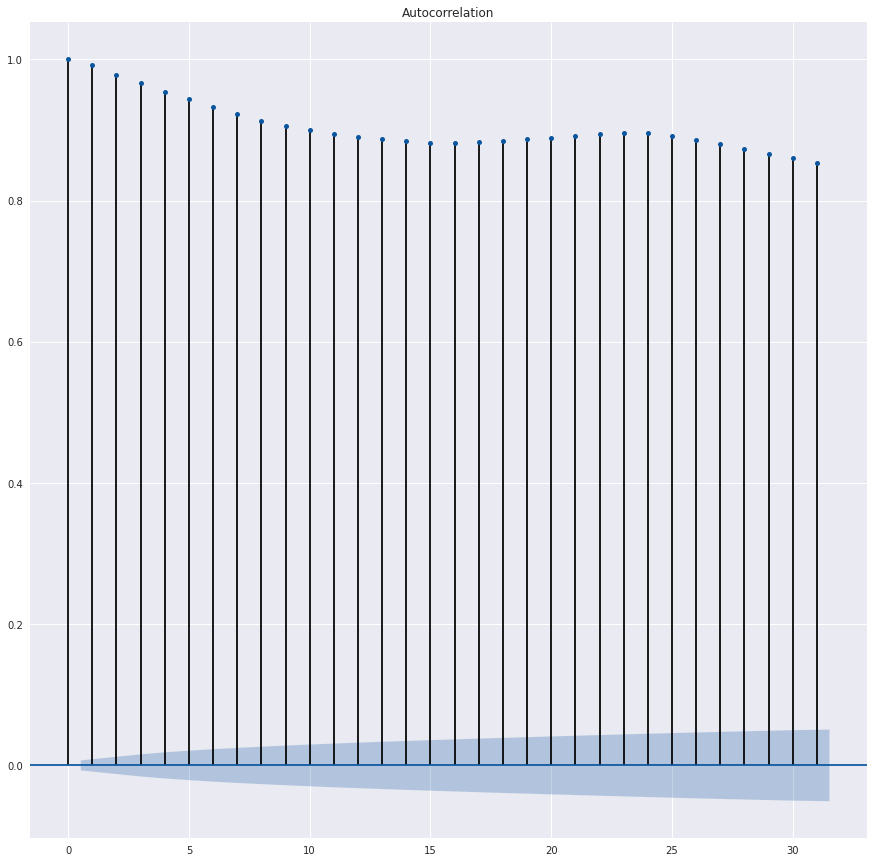

In [141]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1, lags=31)
pyplot.show()

Partial Auto-Correlation

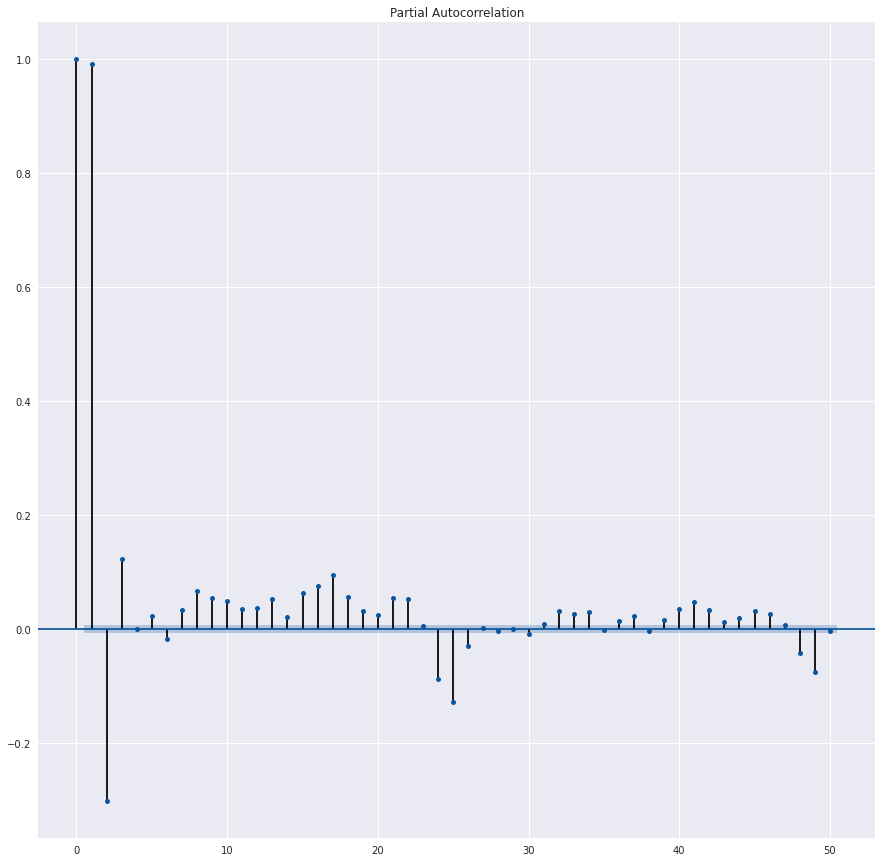

In [142]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df1, lags=50)
pyplot.show()

## **3. Normalizando** #

In [108]:
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score

from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential

#check all the files in the input dataset
#print(os.listdir("../input/"))

In [109]:
df

,Geracao_(GWh),year,month,weekday,weekofyear,quarter
Data/Hora,,,,,,
2013-09-07 00:00:00,0.566820,2013,9,5,36,3
2013-09-07 01:00:00,0.737390,2013,9,5,36,3
2013-09-07 02:00:00,0.741970,2013,9,5,36,3
2013-09-07 03:00:00,0.733230,2013,9,5,36,3
2013-09-07 04:00:00,0.798950,2013,9,5,36,3
...,...,...,...,...,...,...
2022-01-17 19:00:00,0.741464,2022,1,0,3,1
2022-01-17 20:00:00,0.740971,2022,1,0,3,1
2022-01-17 21:00:00,0.741890,2022,1,0,3,1


In [110]:
temp = df.copy() # make temporary copy of dataframe
dataset = temp['Geracao_(GWh)'].values # numpy.ndarray of the actual load
dataset = dataset.astype('float32') 
dataset = np.reshape(dataset, (-1, 1)) # reshape to one feature; required for the models

#scaler = MinMaxScaler(feature_range=(0, 1)) # Min Max scaler
#dataset = scaler.fit_transform(dataset) # fit and transform the dataset

# Train and Test splits
train_size = int(len(dataset) * 0.80) 
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 25 # timesteps to lookback for predictions
X_train, trainY = create_dataset(train, look_back)
X_test, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print("Shapes: \nTraining set: {}, Testing set: {}".format(X_train.shape, X_test.shape))
print("Sample from training set: \n{}".format(X_train[0]))

Shapes: 
Training set: (59585, 1, 25), Testing set: (14877, 1, 25)
Sample from training set: 
[[0.56682 0.73739 0.74197 0.73323 0.79895 0.79833 0.80018 0.79931 0.79672
  0.78602 0.84738 0.84956 0.85127 0.85236 0.84996 0.84848 0.84359 0.84886
  0.84961 0.85043 0.8506  0.85125 0.85071 0.84594 0.85059]]


Modelo de Demanda de Energia em Séries Temporais medição horaria
https://www.kaggle.com/varanr/hourly-energy-demand-time-series-forecast

##Models and their MAPE
Here we test various models and visualize their predictions. Models used are:

AutoRegressive
Moving Average
ARMA
ARIMA
LSTM

In [ ]:
from statsmodels.tsa.ar_model import AR

model = AR(train)
model_fit = model.fit()

##LSTM

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
# Any results you write to the current directory are saved as output.

In [ ]:
temp = df
dataset = temp['Geracao_(GWh)'].dropna().values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1)) # Min Max scaler
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 25
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=200, batch_size=70, validation_data=(X_test, Y_test),verbose=1, shuffle=False)

model.summary()

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

In [ ]:
mape_train = np.mean(np.abs((Y_train[0] - train_predict[:,0]) / Y_train[0])) * 100
mape_test = np.mean(np.abs((Y_test[0] - test_predict[:,0]) / Y_test[0])) * 100

print("Train MAPE: {}, Test MAPE: {}".format(mape_train, mape_test))

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [ ]:
idx = 200
aa=[x for x in range(idx)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:idx], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('TOTAL Load', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

## **Decomposiçao da Serie**

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

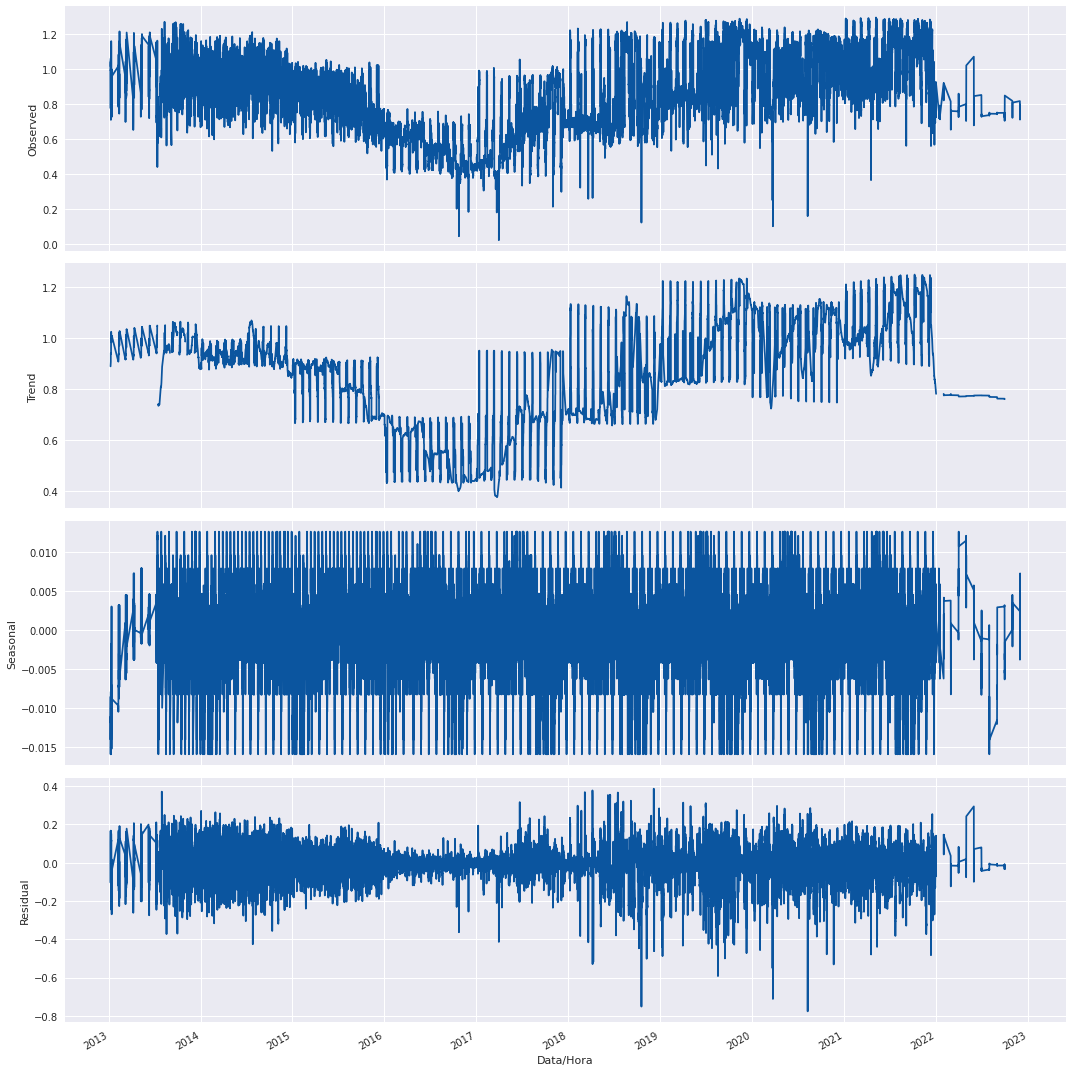

In [146]:
result = seasonal_decompose(df1, model='additive', freq=365)
result.plot()
pyplot.show()

# Teste

In [178]:
df2=df[['Geracao_(GWh)',	'year']]
df2.head()

,Geracao_(GWh),year
Data/Hora,,
2013-09-07 00:00:00,0.56682,2013
2013-09-07 01:00:00,0.73739,2013
2013-09-07 02:00:00,0.74197,2013
2013-09-07 03:00:00,0.73323,2013
2013-09-07 04:00:00,0.79895,2013


In [185]:
df2.info

<bound method DataFrame.info of                      Geracao_(GWh)  year
Data/Hora                               
2013-09-07 00:00:00       0.566820  2013
2013-09-07 01:00:00       0.737390  2013
2013-09-07 02:00:00       0.741970  2013
2013-09-07 03:00:00       0.733230  2013
2013-09-07 04:00:00       0.798950  2013
...                            ...   ...
2022-01-17 19:00:00       0.741464  2022
2022-01-17 20:00:00       0.740971  2022
2022-01-17 21:00:00       0.741890  2022
2022-01-17 22:00:00       0.739852  2022
2022-01-17 23:00:00       0.740491  2022

[74514 rows x 2 columns]>

In [189]:
df3= df2.groupby(['year']).sum()
df3.head()

,Geracao_(GWh)
year,
2013,4028.558318
2014,8193.022369
2015,7204.733258
2016,4756.022458
2017,5719.720343


In [190]:
years = DataFrame()
for name, group in df3:
	years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

ValueError: ignored

In [200]:
series1 = read_csv('/content/Geracao_Energia/Base_ONS/4. Simples_Geração_de_Energia_Dia_data AMAZONAS.csv', sep = ';', 
                 index_col=0, header=0, parse_dates=True, squeeze=True) # header=0, index_col=0, parse_dates=True, squeeze=True
   

In [208]:
series2=series1[['Selecione Tipo de GE Simp 4']]
series2['Selecione Tipo de GE Simp 4']=series2['Selecione Tipo de GE Simp 4'].apply(lambda x: str(x).replace(',','.'))
series3=series2['Selecione Tipo de GE Simp 4'].astype('float64')
series3


Data Escala de Tempo 1 GE Simp 4
2013-09-07 00:00:00    0.566820
2013-09-07 01:00:00    0.737390
2013-09-07 02:00:00    0.741970
2013-09-07 03:00:00    0.733230
2013-09-07 04:00:00    0.798950
                         ...   
2022-01-17 19:00:00    0.741464
2022-01-17 20:00:00    0.740971
2022-01-17 21:00:00    0.741890
2022-01-17 22:00:00    0.739852
2022-01-17 23:00:00    0.740491
Name: Selecione Tipo de GE Simp 4, Length: 74514, dtype: float64

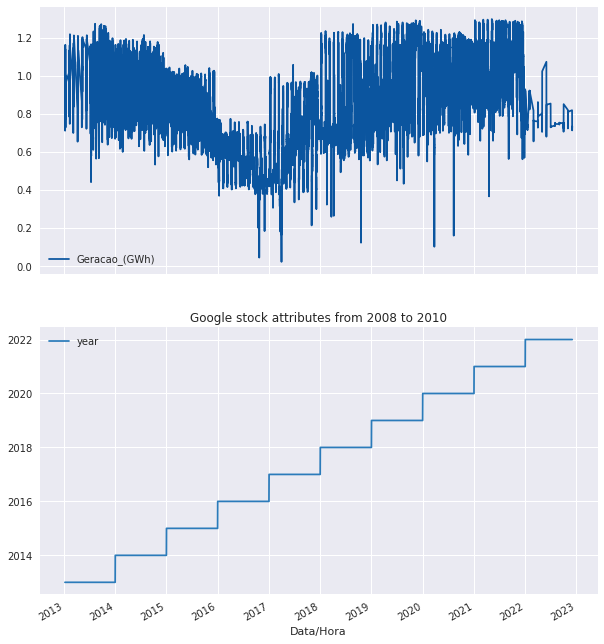

In [212]:
df2['2008':'2022'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.savefig('stocks.png')
plt.show()